In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime
from matplotlib.pyplot import figure

In [3]:
df=pd.read_csv('Daily_cases/Daily_increase_by_LGA.csv')
df

,Row Labels,Alpine,Ararat,Ballarat,Banyule,Bass,Baw,Bayside,Benalla,Boroondara,...,Wellington,West,Whitehorse,Whittlesea,Wodonga,Wyndham,Yarra,Yarra.1,Yarriambiack,Grand Total
0,25/01/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,28/01/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,30/01/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,31/01/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,22/02/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,14/09/21,0,0,2,4,0,0,0,0,3,...,0,0,1,32,0,48,8,1,0,402
439,15/09/21,0,0,3,9,0,0,1,0,1,...,0,0,2,42,0,29,7,1,0,504
440,16/09/21,0,0,3,9,0,0,0,0,0,...,0,0,2,45,0,51,7,3,0,514
441,17/09/21,0,0,2,8,1,0,4,0,1,...,0,0,1,62,0,50,4,2,0,535


In [4]:
df=df.drop(442)
df=df.rename(columns={df.columns[0]:'Date'})
df

,Date,Alpine,Ararat,Ballarat,Banyule,Bass,Baw,Bayside,Benalla,Boroondara,...,Wellington,West,Whitehorse,Whittlesea,Wodonga,Wyndham,Yarra,Yarra.1,Yarriambiack,Grand Total
0,25/01/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,28/01/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,30/01/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,31/01/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,22/02/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,13/09/21,0,0,1,2,0,0,2,0,1,...,0,0,1,37,0,36,8,2,0,437
438,14/09/21,0,0,2,4,0,0,0,0,3,...,0,0,1,32,0,48,8,1,0,402
439,15/09/21,0,0,3,9,0,0,1,0,1,...,0,0,2,42,0,29,7,1,0,504
440,16/09/21,0,0,3,9,0,0,0,0,0,...,0,0,2,45,0,51,7,3,0,514


In [5]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True,format='%d/%m/%y')

df

,Date,Alpine,Ararat,Ballarat,Banyule,Bass,Baw,Bayside,Benalla,Boroondara,...,Wellington,West,Whitehorse,Whittlesea,Wodonga,Wyndham,Yarra,Yarra.1,Yarriambiack,Grand Total
0,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2020-01-28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2020-01-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2020-01-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2020-02-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,2021-09-13,0,0,1,2,0,0,2,0,1,...,0,0,1,37,0,36,8,2,0,437
438,2021-09-14,0,0,2,4,0,0,0,0,3,...,0,0,1,32,0,48,8,1,0,402
439,2021-09-15,0,0,3,9,0,0,1,0,1,...,0,0,2,42,0,29,7,1,0,504
440,2021-09-16,0,0,3,9,0,0,0,0,0,...,0,0,2,45,0,51,7,3,0,514


In [6]:
df=df.loc[df.Date.dt.year==2020]

In [7]:
grouped_df=df.groupby(df['Date'].dt.month).sum()
grouped_df

,Alpine,Ararat,Ballarat,Banyule,Bass,Baw,Bayside,Benalla,Boroondara,Brimbank,...,Wellington,West,Whitehorse,Whittlesea,Wodonga,Wyndham,Yarra,Yarra.1,Yarriambiack,Grand Total
Date,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,1,6,50,2,5,21,3,52,26,...,6,1,10,13,1,22,19,18,1,949
4,0,0,2,32,2,0,7,0,16,7,...,6,0,11,8,0,5,8,4,0,409
5,0,4,1,7,0,0,2,0,6,37,...,0,0,2,14,0,22,4,4,0,289
6,1,0,0,6,0,1,3,0,6,59,...,0,0,1,30,0,27,11,1,0,583
7,0,0,18,236,4,4,60,1,96,937,...,2,0,90,575,1,1047,251,129,0,8493
8,0,3,31,93,2,6,152,0,76,833,...,3,0,74,524,0,979,140,90,0,8367
9,0,0,0,8,0,1,19,0,8,123,...,0,0,13,26,0,129,9,3,0,1080


In [8]:
grouped_df.index.names = ['Month']
# grouped_df.info()

In [9]:
grouped_df

,Alpine,Ararat,Ballarat,Banyule,Bass,Baw,Bayside,Benalla,Boroondara,Brimbank,...,Wellington,West,Whitehorse,Whittlesea,Wodonga,Wyndham,Yarra,Yarra.1,Yarriambiack,Grand Total
Month,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,1,6,50,2,5,21,3,52,26,...,6,1,10,13,1,22,19,18,1,949
4,0,0,2,32,2,0,7,0,16,7,...,6,0,11,8,0,5,8,4,0,409
5,0,4,1,7,0,0,2,0,6,37,...,0,0,2,14,0,22,4,4,0,289
6,1,0,0,6,0,1,3,0,6,59,...,0,0,1,30,0,27,11,1,0,583
7,0,0,18,236,4,4,60,1,96,937,...,2,0,90,575,1,1047,251,129,0,8493
8,0,3,31,93,2,6,152,0,76,833,...,3,0,74,524,0,979,140,90,0,8367
9,0,0,0,8,0,1,19,0,8,123,...,0,0,13,26,0,129,9,3,0,1080


([<matplotlib.axis.XTick at 0x7fc330032af0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

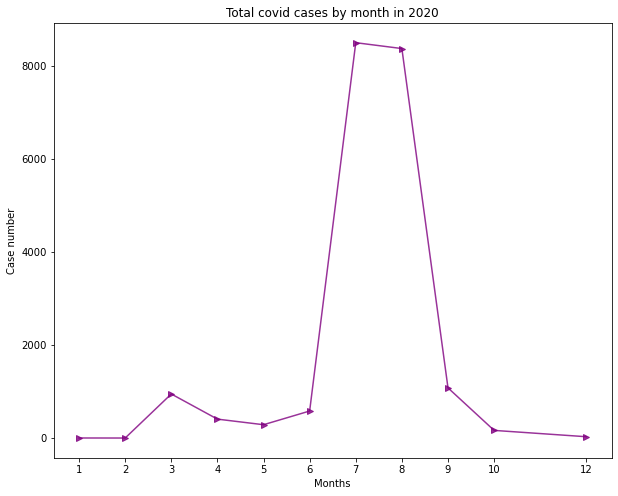

In [10]:
# total case change by month in 2020
x=grouped_df.index
f = plt.figure(figsize=(10,8))
plt.plot(grouped_df.index, grouped_df['Grand Total'],alpha=0.8, marker='>',color='purple')
plt.title('Total covid cases by month in 2020')
plt.xlabel("Months")
plt.ylabel('Case number')
plt.xticks(x)

In [11]:
grouped_df.to_csv('Daily_cases/case_by_month_2020.csv')

In [41]:
x=grouped_df.index
total_case_by_LGA=[]
new_series=grouped_df.sum(axis=0)
LGA_df=pd.DataFrame(new_series)
LGA_df=LGA_df.rename(columns={LGA_df.columns[0]:'Case total'})
LGA_df.to_csv('Daily_cases/total_case_by_LGA_2020.csv')

top_10_LGA=LGA_df['Case total'].sort_values(ascending=False).head(11).to_frame().drop(index='Grand Total')
bottom_10_LGA=LGA_df['Case total'].sort_values().head(10).to_frame()



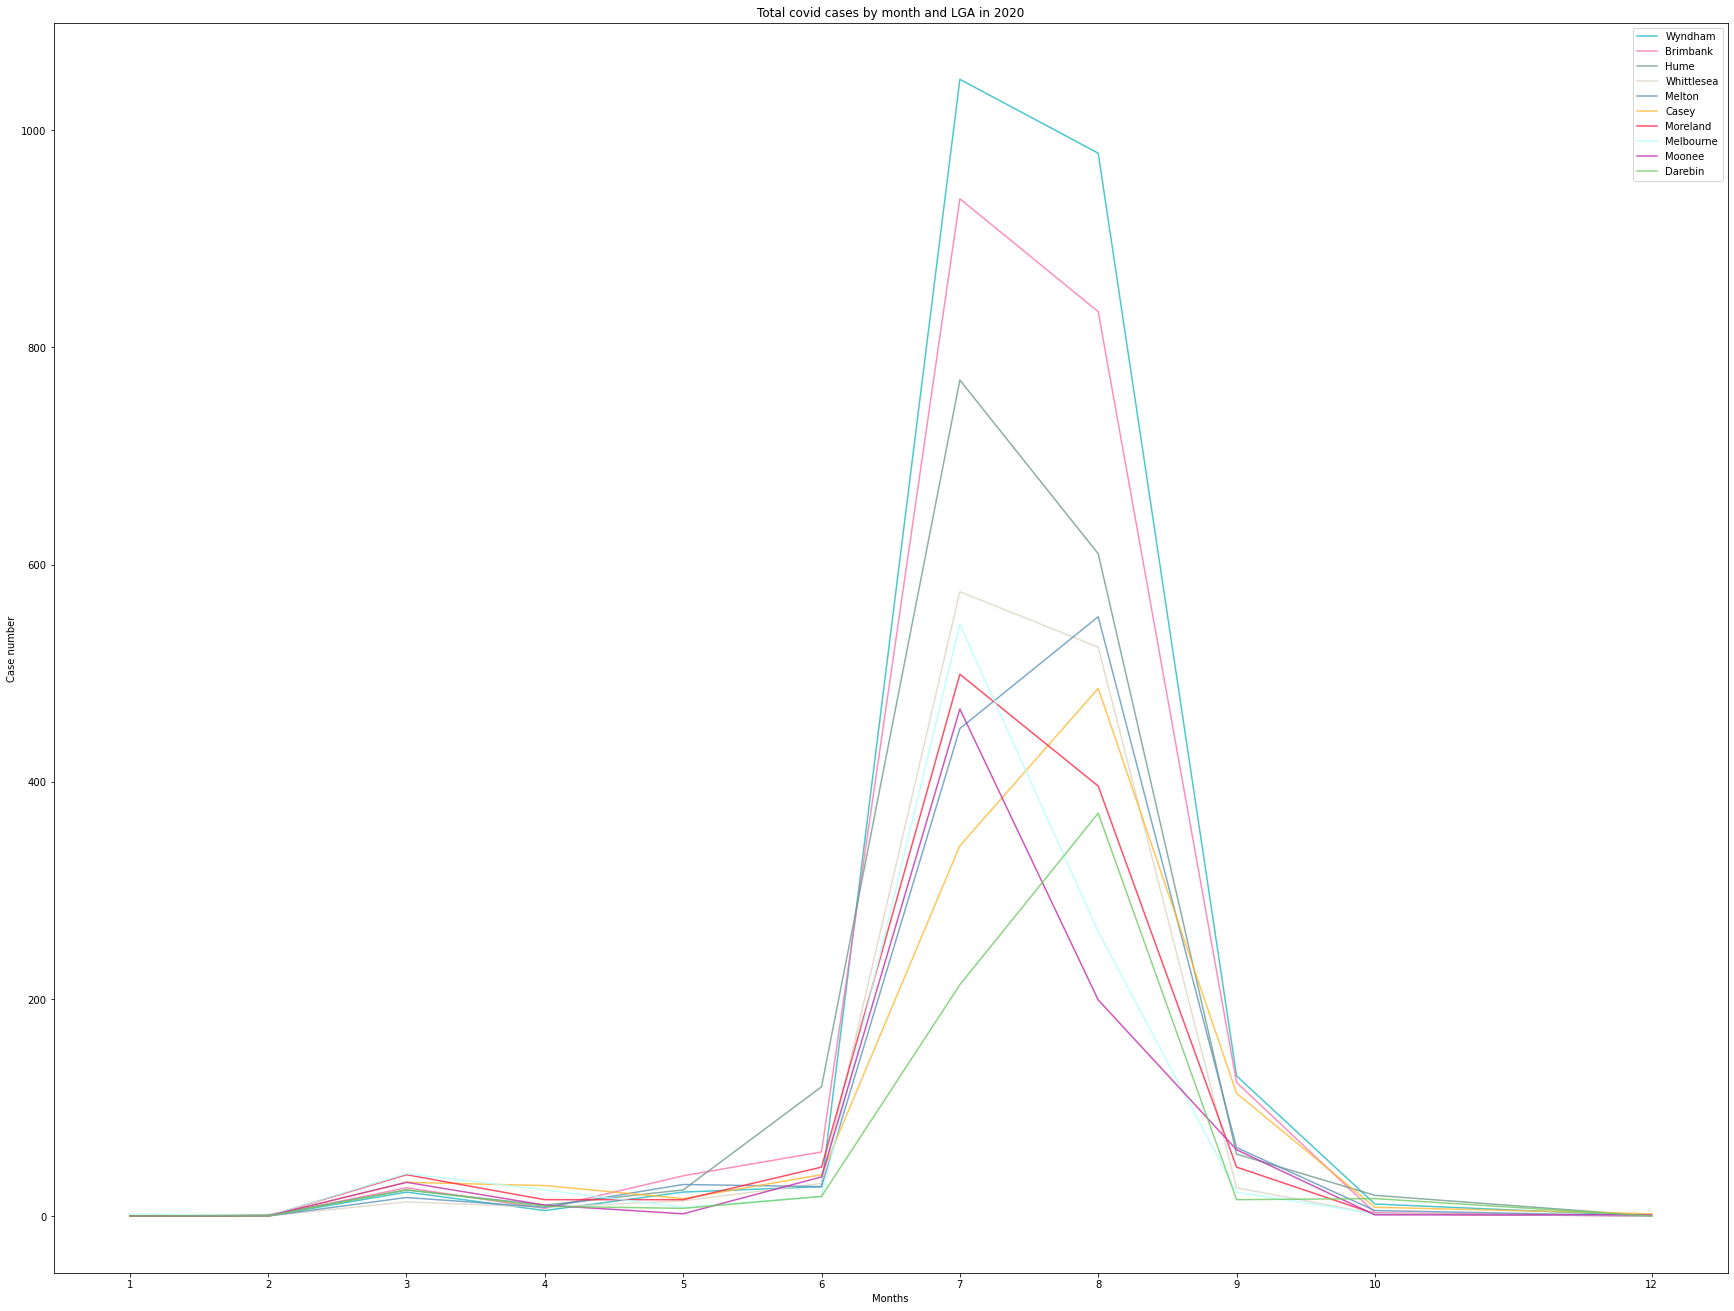

In [45]:
f = plt.figure(figsize=(30,23))
i=0
color=['#1DB9C3','#FD72AD','#6F9A8D','#DED5C4','#5C94BD','#FFB830','#FF2442','#B1FFFD','#C32BAD','#6ECB63']
for column in top_10_LGA.index:
    plt.plot(grouped_df.index,grouped_df[column],alpha=0.8,color=color[i],label=column)
    i+=1
plt.title('Total covid cases by month and LGA in 2020')
plt.xlabel("Months")
plt.ylabel('Case number')
plt.xticks(x)
plt.legend()